In [96]:
!pip install chart-studio

     --------------------------------------- 15.3/15.3 MB 38.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = y.astype(np.uint8)

c:\users\horya\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\categorical.py:527: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [6]:
enc.fit(y[:,np.newaxis])

C:\Users\horya\AppData\Local\Temp\ipykernel_5548\4241405308.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  enc.fit(y[:,np.newaxis])


OneHotEncoder()

In [7]:
Y = enc.transform(y[:,np.newaxis]).toarray()

C:\Users\horya\AppData\Local\Temp\ipykernel_5548\752173705.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = enc.transform(y[:,np.newaxis]).toarray()


In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [30]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train, Valid 구분

In [40]:
N = len(X_train)
shuffled_indices = np.random.permutation(N)

X_shuffled = X_train.iloc[shuffled_indices,]
y_shuffled = y_train[shuffled_indices,]

X_train, X_valid, y_train, y_valid = X_shuffled[:50000], X_shuffled[50000:], y_shuffled[:50000], y_shuffled[50000:]


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def softmax(X, W):
    K = np.size(W, 1)
    A = np.exp(X @ W)
    B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
    Y = B @ A
    return Y

In [28]:
def compute_cost(X, T, W, L):
    epsilon = 1e-5
    N = len(T)
    K = np.size(T, 1)
    cost = - (1/N) * np.ones((1,N)) @ (np.multiply(np.log(softmax(X, W) + epsilon), T)) @ np.ones((K,1)) + (1/2)*L*np.linalg.norm(W)
    return cost

In [17]:
def predict(X, W):
    return np.argmax((X @ W), axis=1)

In [18]:
def batch_gd(X, T, W, learning_rate, iterations, batch_size, L):
    N = len(T)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    T_shuffled = T[shuffled_indices]

    for i in range(iterations):
        j = i % N
        X_batch = X_shuffled[j:j+batch_size]
        T_batch = T_shuffled[j:j+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            T_batch = np.vstack((T_batch, T_shuffled[:(batch_size - T_batch.shape[0])]))
        W = W - (learning_rate/batch_size) * (X_batch.T @ (softmax(X_batch, W) - T_batch))
        cost_history[i] = compute_cost(X_batch, T_batch, W, L)
        if i % 1000 == 0:
            print(cost_history[i][0])

    return (cost_history, W)

In [26]:
X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
T = y_train

K = np.size(T, 1)
M = np.size(X, 1)
W = np.zeros((M,K))

iterations = 50000
learning_rate = 0.01
L = 0.5
initial_cost = compute_cost(X, T, W, L)

print("Initial Cost is: {} \n".format(initial_cost[0][0]))

(cost_history, W_optimal) = batch_gd(X, T, W, learning_rate, iterations, 64, L)

Initial Cost is: 2.3024850979937166 

2.2775665511080905
0.5693718745446743
0.5879859165775825
0.5141169108713268
0.40709122816656584
0.27956357846252256
0.3382532702477732
0.39607093023300793
0.4017196306989658
0.3249389551981478
0.3752509366282908
0.36783310971574235
0.2656392536380785
0.25592916362850926
0.36056886009929856
0.3862815626372433
0.4495874745358227
0.2925139894799218
0.4063539934697756
0.17570043149106698
0.29210400487457916
0.3022754606303976
0.3759342976928166
0.29755497974021633
0.35329605209493875
0.4975478159798599
0.42651576958652593
0.5334136489294024
0.5487907484905515
0.309313473309121
0.3212967766603576
0.31035840153221306
0.29823105899040564
0.3300162456834275
0.37815562257753066
0.4210207158783611
0.28320105377396143
0.6681595829468838
0.2757415150373225
0.4401709922715722
0.29413628349567816
0.33010827216337146
0.2739928571143396
0.2830033317777987
0.2804132606210998
0.3555609857581132
0.6311834571266298
0.18897592656751416
0.35744739182254615
0.30275430940

## lambda 찾기

In [132]:
def search_lambda(X, T, W, learning_rate, iterations, batch_size = 64, start = 0, end = 1, interval = 0.1, early_stopping = 5):
    opt_L = 0
    opt_W = 0
    early = 0
    score_last = 0
    score_best = 0
    record_lambda = []
    record_score = []
    for L in np.arange(start, end + 1e-10, interval): # lambda 0부터 일정 간격으로 탐색
        L = round(L, 5) #소수점 길어지는 거 방지
        
        (cost_history, W_optimal) = batch_gd(X, T, W, learning_rate, iterations, batch_size, L) # w 최적화
        
        X_ = np.hstack((np.ones((np.size(X_valid, 0),1)),X_valid)) # valid set에 대해 예측
        T_ = y_valid
        y_pred = predict(X_, W_optimal)
        score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_valid))
        print(f'lambda : {L}, accuracy_score : {score}')
        
        record_lambda.append(L) # 시각화를 위해 값 저장
        record_score.append(score)
        
        #early stopping
        if score <= score_last: #score 상승이 없으면 early +1
            early += 1
        
        else:# score 상승이 있으면 갱신
            if score_best < score: #현재 스코어가 기존 최고 스코어보다 크면
                opt_L = L
                opt_W = W_optimal
                score_best = score
                
            early = 0
            
        score_last = score
        
        if early == early_stopping:
            return (opt_L, opt_W, record_lambda, record_score)
        
    return (opt_L, opt_W, record_lambda, record_score)
        

In [125]:
def score_graph(record_lambda, record_score):
    max_idx = record_score.index(max(record_score))

    plt.plot(record_lambda, record_score)
    plt.title('Score Graph by Lambda')
    plt.xlabel('Lambda')
    plt.xticks(np.arange(min(record_lambda), max(record_lambda), 0.1))

    plt.annotate(f'({record_lambda[max_idx]}, {record_score[max_idx]})', xy = (record_lambda[max_idx], record_score[max_idx]))
    plt.ylabel('Score')
    plt.show()

Initial Cost is: 2.3024850979937312 

2.2742288783012863
0.5652621149152401
0.373582180874496
0.5025281326225877
0.2938665591147184
0.3262893425161769
0.359052003730947
0.5116022019957011
0.3081903926626218
0.3215027325325941
lambda : 0.0, accuracy_score : 0.8914
2.2715729487549283
0.7055601169952317
0.47961065778997425
0.4662110802798456
0.48489544369948057
0.4819498751603725
0.5139263925003402
0.47241336835605685
0.4954347765808549
0.4690883296058629
lambda : 0.05, accuracy_score : 0.887
2.2823070680427984
0.6937696345422552
0.6706427142149177
0.6793457092099453
0.7361286304612191
0.6158251856480059
0.7061950579906482
0.707111871292248
0.7825656039500176
0.674701598936587
lambda : 0.1, accuracy_score : 0.8893
2.274967480651456
0.8789559331066352
0.7669908458782246
0.9598281657943135
0.8347045661021064
0.7131381603439539
0.7369187148945888
0.8678096112743799
0.9612232402297363
0.9648688429096182
lambda : 0.15, accuracy_score : 0.8887
2.2844663350652348
0.9373805267074098
0.79303769839

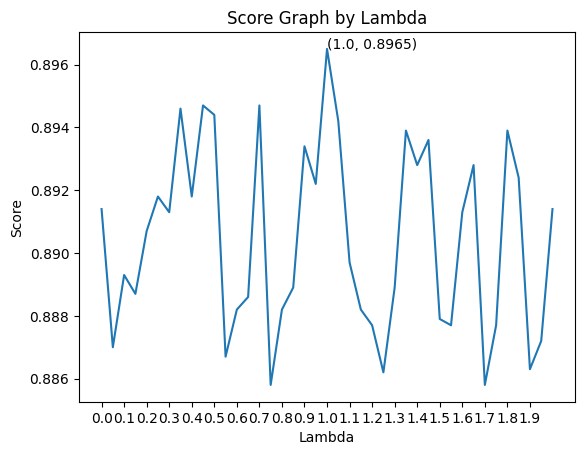

Optimized Lambda : 1.0


In [133]:
X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
T = y_train

K = np.size(T, 1)
M = np.size(X, 1)
W = np.zeros((M,K))

iterations = 10000
learning_rate = 0.01
L = 0 # 규제 없는 상황부터 스타트
initial_cost = compute_cost(X, T, W, L)

print("Initial Cost is: {} \n".format(initial_cost[0][0]))

opt_L, opt_W, record_lambda, record_score = search_lambda(X, T, W, learning_rate, iterations, start = 0, end = 2, interval = 0.05, early_stopping = 10)

score_graph(record_lambda, record_score)
print(f'Optimized Lambda : {opt_L}')

In [46]:
## validation set에 대한 Accuracy
X_ = np.hstack((np.ones((np.size(X_valid, 0),1)),X_valid))
T_ = y_valid
y_pred = predict(X_, W_optimal)
score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_valid))

print(score)

0.9123


In [127]:
## Accuracy
X_ = np.hstack((np.ones((np.size(X_test, 0),1)),X_test))
T_ = y_test
y_pred = predict(X_, W_optimal)
score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_test))

print(score)

0.9133


## 최적화한 가중치 값에 대한 Test set 결과

In [134]:
## Accuracy
X_ = np.hstack((np.ones((np.size(X_test, 0),1)),X_test))
T_ = y_test
y_pred = predict(X_, opt_W)
score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_test))

print(score)

0.9037


기존에 대충 해본 것
0   : 0.9162
0.5, 1/2 : 0.9177  
0.5, 1/N : 0.9133
1, 1/2   : 0.9145

